In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Indlæs datasæt
df = pd.read_csv(r"C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\news_data\bitcoin_news_cleaned_final_01.csv")

# Initialiser VADER
analyzer = SentimentIntensityAnalyzer()

# Aktiver progress bar
tqdm.pandas(desc="Kører VADER på nyhedsartikler")

# Funktion til at udtrække compound-score
def get_vader_score(text):
    if pd.isnull(text) or str(text).strip() == "":
        return 0.0
    return analyzer.polarity_scores(str(text))['compound']

# Kør VADER på title og article_text
df['vader_title_score'] = df['title'].progress_apply(get_vader_score)
df['vader_article_score'] = df['article_text'].progress_apply(get_vader_score)

# Beregn vægtet score (valgfrit – du kan ignorere i analyse)
df['vader_weighted_score'] = (0.4 * df['vader_title_score']) + (0.6 * df['vader_article_score'])

# Gem nyt datasæt med VADER-scores
output_path = r"C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\news_data\bitcoin_news_vader_full.csv"
df.to_csv(output_path, index=False)

print("✔️ Hele datasættet er VADER-scoret og gemt som 'bitcoin_news_vader_full.csv'")


Kører VADER på nyhedsartikler: 100%|██████████| 20257/20257 [04:27<00:00, 75.87it/s] 


✔️ Hele datasættet er VADER-scoret og gemt som 'bitcoin_news_vader_full.csv'


📰 Eksempelartikler med VADER-scores:


🔹 Artikel 1
Titel: Bitcoin touches record above $29,000, extending 2020 rally
Tekst (uddrag): By John McCrank NEW YORK (Reuters) - The price of Bitcoin topped $29,000 on Thursday for the first time, with the digital currency almost quadrupling in value this year amid heightened interest from investors big and small alike. The world's most popular cryptocurrency touched $29,300 before pulling...
VADER titel-score: 0.0
VADER artikel-score: 0.9843
Vægtet samlet score: 0.59058

🔹 Artikel 2
Titel: The Crypto Daily – The Movers and Shakers – January 1st, 2021
Tekst (uddrag): Bitcoin , BTC to USD, rose by 0.18% on Thursday. Following a 5.74% rally on Wednesday, Bitcoin ended the day at $28,938.5. It was a bullish start to the day. Bitcoin rose to an early morning intraday high and a new swing hi $29,286.0 before hitting reverse. Falling short of the first major resistanc...
VADER titel-score: 0.0772
VADER artikel-score: -0.8358
Vægtet samlet score: -0.47

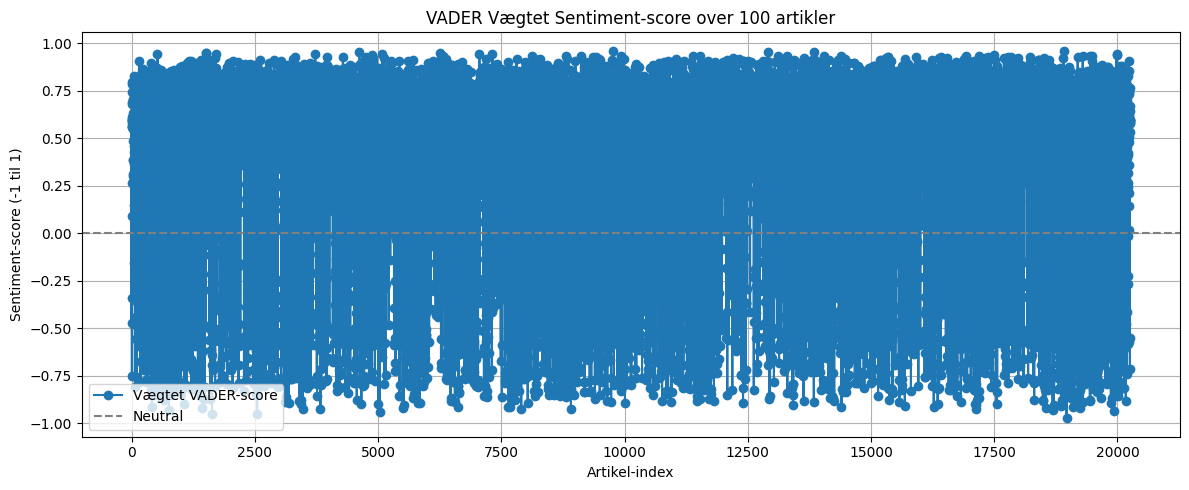

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs datasættet
df = pd.read_csv(r"C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\news_data\bitcoin_news_vader_full.csv")

# Vælg relevante kolonner til gennemgang
cols_to_show = ['title', 'article_text', 'vader_title_score', 'vader_article_score', 'vader_weighted_score']

# Vis de første 5 rækker med både tekst og scores
print("📰 Eksempelartikler med VADER-scores:\n")
for i, row in df[cols_to_show].head(5).iterrows():
    print(f"\n🔹 Artikel {i+1}")
    print(f"Titel: {row['title']}")
    print(f"Tekst (uddrag): {row['article_text'][:300]}...")  # forkort lang tekst
    print(f"VADER titel-score: {row['vader_title_score']}")
    print(f"VADER artikel-score: {row['vader_article_score']}")
    print(f"Vægtet samlet score: {row['vader_weighted_score']}")

# Statistik
print("\n📊 Score-statistik:")
print(df[['vader_title_score', 'vader_article_score', 'vader_weighted_score']].describe())

# Visualisering af sentiment-score over de 100 artikler
plt.figure(figsize=(12, 5))
plt.plot(df['vader_weighted_score'], marker='o', linestyle='-', label='Vægtet VADER-score')
plt.axhline(0, color='gray', linestyle='--', label='Neutral')
plt.title("VADER Vægtet Sentiment-score over 100 artikler")
plt.xlabel("Artikel-index")
plt.ylabel("Sentiment-score (-1 til 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Indlæs datasættet med VADER-scorer
df = pd.read_csv(r"C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\news_data\bitcoin_news_vader_full.csv")

# Tæl manglende scores (NaN)
missing_title = df['vader_title_score'].isnull().sum()
missing_article = df['vader_article_score'].isnull().sum()

# Tæl antal med score = 0.0 (neutral)
zero_title = (df['vader_title_score'] == 0.0).sum()
zero_article = (df['vader_article_score'] == 0.0).sum()

# Totalt antal artikler
total = len(df)

# Udskriv resultat
print("📊 Validering af VADER-scorer:")
print(f"• Total antal artikler:              {total}")
print(f"• Manglende (NaN) titel-scores:      {missing_title}")
print(f"• Manglende (NaN) artikel-scores:    {missing_article}")
print(f"• Antal titel-scores = 0.0:          {zero_title}")
print(f"• Antal artikel-scores = 0.0:        {zero_article}")


📊 Validering af VADER-scorer:
• Total antal artikler:              20257
• Manglende (NaN) titel-scores:      0
• Manglende (NaN) artikel-scores:    0
• Antal titel-scores = 0.0:          9694
• Antal artikel-scores = 0.0:        8
